In [2]:
import os
import numpy as np
from PIL import Image
from keras.models import load_model
import matplotlib.pyplot as plt

## Loading the model

In [8]:
model = load_model('brainTumorCNN_model.keras', compile=False)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

## loading the data from the dataset

In [9]:
testing_path = r"C:\Users\Mayank Rana\OneDrive\Documents\Jupyter_Notebook\archive\Testing"

test_paths = []
test_data = []
test_result = []

for root, dirs, files in os.walk(testing_path):
    for file in files:
        if file.endswith('.jpg'):
            path = os.path.join(root, file)
            test_paths.append(path)

for path in test_paths:
    img = Image.open(path)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize((128, 128))
    img_array = np.array(img) / 255.0
    test_data.append(img_array)
    if 'glioma' in path.lower():
        test_result.append(0)
    elif 'meningioma' in path.lower():
        test_result.append(1)
    elif 'notumor' in path.lower():
        test_result.append(2)
    else:
        test_result.append(3)

X_test = np.array(test_data)
Y_test = np.array(test_result) 


# Finally model predictions

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


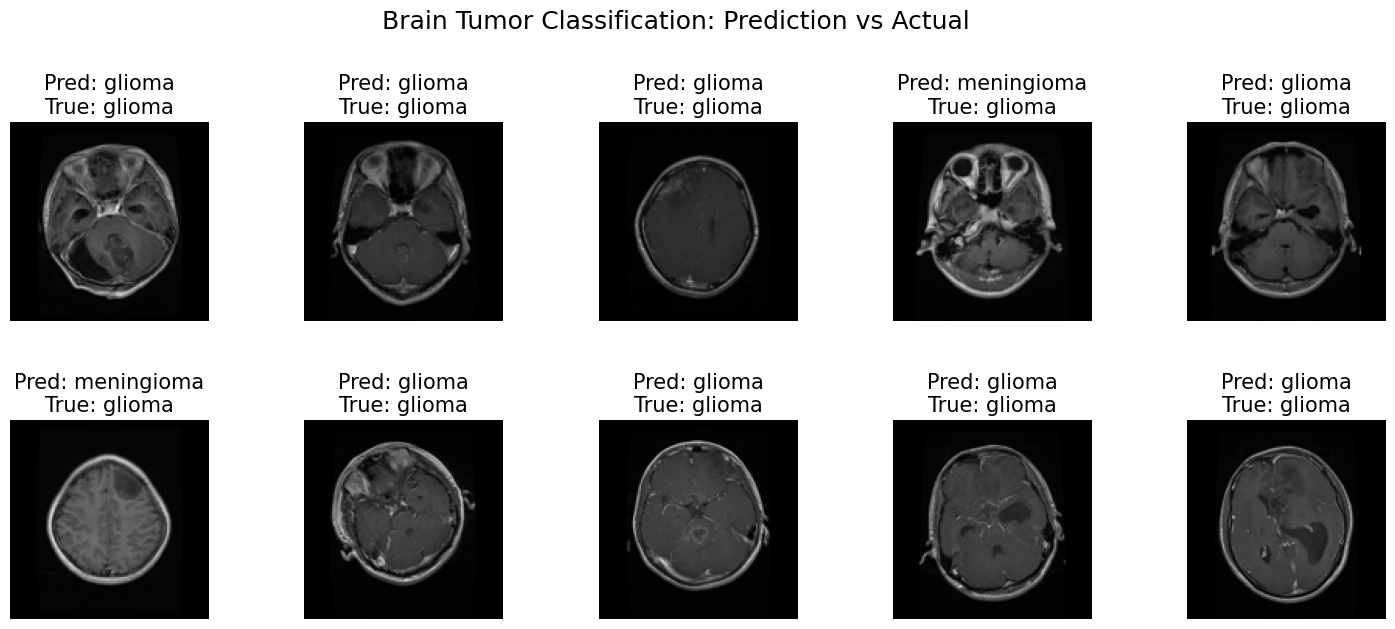

In [10]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

labels = ['glioma', 'meningioma', 'notumor', 'p']

num_images = 10
plt.figure(figsize=(18, 7))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"Pred: {labels[predicted_labels[i]]}\nTrue: {labels[Y_test[i]]}", fontsize=15)
    plt.axis('off')

plt.subplots_adjust(wspace=0.35, hspace=0.5, top=0.82)
plt.suptitle("Brain Tumor Classification: Prediction vs Actual", fontsize=18)
plt.show()
